#Задание на собеседование

Вы хотите выбрать дизайн-проект и место для строительства дома для самоизоляции в Московском регионе. Разные проекты рассчитаны на разный температурный режим (оптимальный интервал температур для каждого проекта).  

У вас есть данные о дневной и ночной температуре за каждый день на протяжении 5 лет. Данные собраны со станций наблюдения в разных районах Московского региона, в каждом районе есть как минимум одна станция наблюдения.  

Вам необходимо проанализировать температурный режим в разных районах региона, чтобы сопоставить имеющиеся проекты с доступными земельными участками.  
- Опишите дизайн таблицы (ее поля) для коллекционирования первичных данных о температуре.
- Разработайте SQL-запрос (или логику python скрипта) для нахождения самого холодного дня месяца в каждом районе .  

[ результат должен иметь вид: дата(первый день месяца); название района; дата самого холодного дня месяца; минимальная температура ] . 


In [ ]:
!gdown --id 1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
!mv _sqlite3.cpython-37m-x86_64-linux-gnu.so /usr/lib/python3.7/lib-dynload/
import os
os.kill(os.getpid(), 9)

Downloading...
From: https://drive.google.com/uc?id=1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
To: /content/_sqlite3.cpython-37m-x86_64-linux-gnu.so
100% 6.33M/6.33M [00:00<00:00, 23.9MB/s]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import random


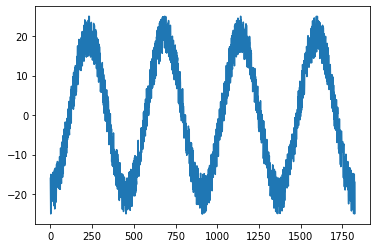

In [2]:
n_years = 5 # Количество лет
days_period = 365*n_years # Количество дней за эти 5 лет
x0 = np.sin(np.linspace(-0.5*np.pi,1.5*np.pi*n_years,days_period))*20
x = x0 + [random.randint(-5,5) for i in range(days_period)]
plt.plot(x)
plt.show()

Задал тренд изменения температуры от -20 до +20 в виде функции синуса. Дальше добавил случайные изменения температуры для каждого дня в диапазоне от [-5,5]

In [3]:
date_range = pd.date_range(start='1/1/2018', periods = days_period)
# print(len(date_range))
# date_range
district_stantions_ids = {1: [1,2,3], 2: [5,6], 3: [7]}
print(f'Временной промежуток c {date_range[0]} по {date_range[-1]}')
print(f'Словарь с данными id районов и принадлежащих к ним id станций:\n{district_stantions_ids}')

Временной промежуток c 2018-01-01 00:00:00 по 2022-12-30 00:00:00
Словарь с данными id районов и принадлежащих к ним id станций:
{1: [1, 2, 3], 2: [5, 6], 3: [7]}


In [4]:
def get_temp():
  return x0 + [random.randint(-5,5) for i in range(days_period)]

def get_stantion_data(district_id, station_id):
  return pd.DataFrame({'district_id': [district_id]*days_period, 'stantion_id': [station_id]*days_period, 'date': date_range, 'day_T': get_temp(), 'night_T': get_temp()})


Определил две функции. Первая *get_temp()* задает температуру для заданного периода времени.  
Вторая функция принимает значения id района и станции, дальше выдает табличку

In [5]:
df0 = pd.DataFrame([[1,1,'01/01/21',-5.3,-10.0],[1,2,'01/01/21',-6.1,-9.7],[2,3,'01/01/21',-5.1,-9.2],[2,4,'01/01/21',-5.8,-8.9],[3,5,'01/01/21',-6.0,-9.8],
                   [1,1,'02/01/21',-4.3,-9.0],[1,2,'02/01/21',-5.1,-8.7],[2,3,'02/01/21',-4.1,-8.2],[2,4,'02/01/21',-4.8,-7.9],[3,5,'02/01/21',-5.0,-8.8],
                   [1,1,'02/02/21',-4.3,-9.0],[1,2,'02/02/21',-5.1,-8.7],[2,3,'02/02/21',-4.1,-8.2],[2,4,'02/02/21',-4.8,-7.9],[3,5,'02/02/21',-5.0,-8.8]],
                  columns = ['district_id', 'stantion_id','date','day_T','night_T'] )
#df

In [33]:
data = []
for k in district_stantions_ids.keys():
  for v in district_stantions_ids[k]:
    data.append(get_stantion_data(k,v))

df = pd.concat(data, ignore_index=True)
# df.info()

##Описание полей таблицы для сбора первичных данных:

- *district_id* - ID района, где происходит сбор данных. Тип данных INTEGER. значение для каждого района уникальное
- *station_id*  - ID станции, на который происходил замер температуры (таких станций для каждого района должно быть минимум 1) Тип данных INTEGER. значение для каждой станции уникальное
- *date* - дата, когда происходил сбор данных. Тип данных DATETIME
- *day_T* - дневной замер температуры. Тип данных FLOAT (REAL)
- *night_T* - ночной замер температуры. Тип данных FLOAT (REAL)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   district_id  10950 non-null  int64         
 1   stantion_id  10950 non-null  int64         
 2   date         10950 non-null  datetime64[ns]
 3   day_T        10950 non-null  float64       
 4   night_T      10950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 427.9 KB


Получил исходные данные (обычно из csv файла загружаем, но здесь сам в качестве примера вбил данные)
Теперь преобразовываю данные с датой в правильный формат `datetime`

In [35]:
try:
  df['date'] = pd.to_datetime(df['date'], dayfirst = True, format = '%d/%m/%y')
except:
  print('проверь данные на входе для преобразования')

Добавил столбик с первой датой месяца в таблице

In [36]:
df['month'] = df['date'].astype("datetime64[M]")
df0['month'] = df0['date'].astype("datetime64[M]")

In [37]:
df.sample(15)

,district_id,stantion_id,date,day_T,night_T,month
6802,2,5,2021-08-20,-18.892462,-11.892462,2021-08-01
7165,2,5,2022-08-18,9.442069,2.442069,2022-08-01
3901,1,3,2018-09-09,21.004026,20.004026,2018-09-01
4900,1,3,2021-06-04,2.101755,-2.898245,2021-06-01
7974,2,6,2019-11-06,21.810442,21.810442,2019-11-01
6104,2,5,2019-09-22,10.526443,19.526443,2019-09-01
3336,1,2,2022-02-20,4.780787,10.780787,2022-02-01
687,1,1,2019-11-19,14.982915,21.982915,2019-11-01
3911,1,3,2018-09-19,19.967820,22.967820,2018-09-01
8079,2,6,2020-02-19,5.176381,8.176381,2020-02-01


In [54]:
output = df.groupby(['month','district_id','date','stantion_id']).agg({'day_T': 'min','night_T': 'min'}).reset_index()
#output['min_temp_flag'] = output[['day_T','night_T']].apply(lambda row: 'd' if row.day_T < row.night_T else 'n', axis =1)
output['min_temp'] = output[['day_T','night_T']].apply(lambda row: row.day_T if row.day_T < row.night_T else row.night_T, axis =1)
output.head(10)

,month,district_id,date,stantion_id,day_T,night_T,min_temp
0,2018-01-01,1,2018-01-01,1,-19.000000,-23.000000,-23.000000
1,2018-01-01,1,2018-01-01,2,-18.000000,-15.000000,-18.000000
2,2018-01-01,1,2018-01-01,3,-20.000000,-18.000000,-20.000000
3,2018-01-01,1,2018-01-02,1,-21.998101,-21.998101,-21.998101
4,2018-01-01,1,2018-01-02,2,-15.998101,-18.998101,-18.998101
5,2018-01-01,1,2018-01-02,3,-20.998101,-22.998101,-22.998101
6,2018-01-01,1,2018-01-03,1,-20.992406,-19.992406,-20.992406
7,2018-01-01,1,2018-01-03,2,-20.992406,-15.992406,-20.992406
8,2018-01-01,1,2018-01-03,3,-16.992406,-23.992406,-23.992406
9,2018-01-01,1,2018-01-04,1,-14.982915,-15.982915,-15.982915


In [55]:
# data_index = df.groupby(['month','district_id'])[['day_T','night_T']].idxmin().reset_index()
# data_index = data_index.rename(columns={'day_T':'day_T_index', 'night_T':'night_T_index'})
# data_index.head(10)

In [56]:
# output = output.merge(data_index, how = 'left', on = ['month','district_id'])


In [57]:
# output['date'] = output.apply(lambda row: df.loc[row.day_T_index,'date'] if row.min_temp == 'd' else df.loc[row.night_T_index,'date'],axis = 1)
# output.head(10)

In [58]:
output = output.groupby(['month', 'district_id', 'date']).min_temp.mean().reset_index()
print(len(output))
output.head()

5475


,month,district_id,date,min_temp
0,2018-01-01,1,2018-01-01,-20.333333
1,2018-01-01,1,2018-01-02,-21.331435
2,2018-01-01,1,2018-01-03,-21.992406
3,2018-01-01,1,2018-01-04,-17.649582
4,2018-01-01,1,2018-01-05,-20.302964


In [59]:
output = output.loc[output.groupby(['month','district_id'])['min_temp'].idxmin()]

# output = output.groupby(['month','district_id']).min_temp.min().reset_index()
print(len(output))
output.head()

180


,month,district_id,date,min_temp
7,2018-01-01,1,2018-01-08,-24.573708
37,2018-01-01,2,2018-01-07,-24.431690
66,2018-01-01,3,2018-01-05,-24.969630
99,2018-02-01,1,2018-02-07,-21.123315
121,2018-02-01,2,2018-02-01,-21.703033


In [60]:
#output[['month','district_id','date', 'min_temp']].head(15)

In [61]:
len(output)

180

Получил по сгруппированным данным по месяцу и району номера строк, где минимальная температура среди всех станций. Дальше выбрал необходимые мне столбцы.

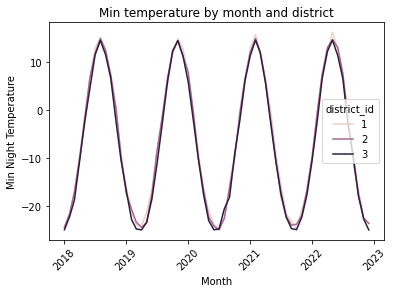

In [62]:
sns.lineplot(data = output, x = 'month', y = 'min_temp', hue='district_id')
plt.xticks(rotation = 45)
plt.title('Min temperature by month and district')
plt.ylabel('Min Night Temperature')
plt.xlabel('Month')
plt.show()

# Тоже самое задание, только с запросом sql

In [17]:
con = sqlite3.connect('db')

In [18]:
def select(sql):
  return pd.read_sql(sql,con)

In [63]:
df.to_sql('test_table',con,index = False, if_exists='replace')

In [64]:
sql = '''
select *
from test_table t
limit 15'''


In [65]:
select(sql)

,district_id,stantion_id,date,day_T,night_T,month
0,1,1,2018-01-01 00:00:00,-19.000000,-23.000000,2018-01-01 00:00:00
1,1,1,2018-01-02 00:00:00,-21.998101,-21.998101,2018-01-01 00:00:00
2,1,1,2018-01-03 00:00:00,-20.992406,-19.992406,2018-01-01 00:00:00
3,1,1,2018-01-04 00:00:00,-14.982915,-15.982915,2018-01-01 00:00:00
4,1,1,2018-01-05 00:00:00,-16.969630,-14.969630,2018-01-01 00:00:00
5,1,1,2018-01-06 00:00:00,-19.952554,-21.952554,2018-01-01 00:00:00
6,1,1,2018-01-07 00:00:00,-23.931690,-17.931690,2018-01-01 00:00:00
7,1,1,2018-01-08 00:00:00,-24.907041,-14.907041,2018-01-01 00:00:00
8,1,1,2018-01-09 00:00:00,-15.878614,-22.878614,2018-01-01 00:00:00
9,1,1,2018-01-10 00:00:00,-15.846412,-24.846412,2018-01-01 00:00:00


In [66]:
sql = '''
select month, district_id, date, min(night_T)
from test_table t
group by month, district_id'''

In [67]:
select(sql)

,month,district_id,date,min(night_T)
0,2018-01-01 00:00:00,1,2018-01-10 00:00:00,-24.846412
1,2018-01-01 00:00:00,2,2018-01-10 00:00:00,-24.846412
2,2018-01-01 00:00:00,3,2018-01-09 00:00:00,-24.878614
3,2018-02-01 00:00:00,1,2018-02-05 00:00:00,-22.718962
4,2018-02-01 00:00:00,2,2018-02-08 00:00:00,-22.320508
...,...,...,...,...
175,2022-11-01 00:00:00,2,2022-11-29 00:00:00,-23.203033
176,2022-11-01 00:00:00,3,2022-11-20 00:00:00,-22.038388
177,2022-12-01 00:00:00,1,2022-12-29 00:00:00,-24.998101
178,2022-12-01 00:00:00,2,2022-12-07 00:00:00,-24.004026


Результат предыдущей версии решения на новых данных.

In [73]:
sql = """
with table1 as (
select t.*,
case
  when day_T < night_T then day_T
  ELSE night_T
  end as min_T
from test_table t)

select month, district_id, stantion_id, date, min(min_T) as min_T
from table1 t
group by 1,2,3
limit 20
"""

In [74]:
select(sql)

,month,district_id,stantion_id,date,min_T
0,2018-01-01 00:00:00,1,1,2018-01-08 00:00:00,-24.907041
1,2018-01-01 00:00:00,1,2,2018-01-08 00:00:00,-24.907041
2,2018-01-01 00:00:00,1,3,2018-01-20 00:00:00,-24.318517
3,2018-01-01 00:00:00,2,5,2018-01-04 00:00:00,-24.982915
4,2018-01-01 00:00:00,2,6,2018-01-13 00:00:00,-24.727226
5,2018-01-01 00:00:00,3,7,2018-01-05 00:00:00,-24.969630
6,2018-02-01 00:00:00,1,1,2018-02-05 00:00:00,-22.718962
7,2018-02-01 00:00:00,1,2,2018-02-13 00:00:00,-20.591018
8,2018-02-01 00:00:00,1,3,2018-02-07 00:00:00,-22.456649
9,2018-02-01 00:00:00,2,5,2018-02-01 00:00:00,-22.203033


Сделал запрос и получил вывод для каждого месяца, района и его станций минимальную зафиксированную холодную температуру, и дату фиксации. 
Дальше возник вопрос из этого запроса оставить только минимальную температуру, станцию и дату. Или нужно было найти среднее по району с каждой станции за определенную дату и там уже искать минимум?

In [75]:
sql = """
with 
table1 as (
select t.*,
case
  when day_T < night_T then day_T
  ELSE night_T
  end as min_T
from test_table t),

table2 as (
select month, district_id, date, avg(min_T) as min_T
from table1
group by 1,2,3 )

select month, district_id, date, min(min_T) as min_T
from table2
group by 1,2
"""

In [76]:
select(sql)

,month,district_id,date,min_T
0,2018-01-01 00:00:00,1,2018-01-08 00:00:00,-24.573708
1,2018-01-01 00:00:00,2,2018-01-07 00:00:00,-24.431690
2,2018-01-01 00:00:00,3,2018-01-05 00:00:00,-24.969630
3,2018-02-01 00:00:00,1,2018-02-07 00:00:00,-21.123315
4,2018-02-01 00:00:00,2,2018-02-01 00:00:00,-21.703033
...,...,...,...,...
175,2022-11-01 00:00:00,2,2022-11-24 00:00:00,-22.589475
176,2022-11-01 00:00:00,3,2022-11-25 00:00:00,-22.718962
177,2022-12-01 00:00:00,1,2022-12-09 00:00:00,-23.501883
178,2022-12-01 00:00:00,2,2022-12-09 00:00:00,-23.668550


Теперь вроде как сделал все правильно, сначала усреднил за каждую дату по станциям, после уже считал минимальную температуру за месяц. А дальше уже сгруппировал по различным станциям и получил необходимый вывод.

In [78]:
output[['month','district_id','date', 'min_temp']]

,month,district_id,date,min_temp
7,2018-01-01,1,2018-01-08,-24.573708
37,2018-01-01,2,2018-01-07,-24.431690
66,2018-01-01,3,2018-01-05,-24.969630
99,2018-02-01,1,2018-02-07,-21.123315
121,2018-02-01,2,2018-02-01,-21.703033
...,...,...,...,...
5348,2022-11-01,2,2022-11-24,-22.589475
5379,2022-11-01,3,2022-11-25,-22.718962
5393,2022-12-01,1,2022-12-09,-23.501883
5423,2022-12-01,2,2022-12-09,-23.668550
